In [56]:
import nltk
from nltk import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
jobs = pd.read_csv("jobs.csv") # 244,768 records
jobs_sample = jobs.sample(1000) # 1,000 records

In [46]:
jobs_sample['tokenized_strip'] = jobs_sample.apply(lambda row: row['FullDescription'].decode('utf-8').strip(),axis=1)
jobs_sample['tokenized'] = jobs_sample.apply(lambda row: nltk.word_tokenize(row['tokenized_strip']),axis=1)

In [54]:
tokens_series = pd.Series(jobs_sample['tokenized'])
tokens_list = tokens_series.tolist()

tokens = []
for sentence in tokens_list:
    for word in sentence:
        tokens.append(word)

In [51]:
tokens_pos = nltk.pos_tag(tokens)

### Most Common POS

In [13]:
words, pos = zip(*tokens_pos) # Unzip
pos_freq = FreqDist(pos)
pos_freq.most_common()[:5] #Most frequent POS's

[('NN', 45826), ('NNP', 33489), ('IN', 25807), ('JJ', 22037), ('DT', 20021)]

### Most Common POS' Frequencies

In [14]:
for a, b in pos_freq.most_common()[:5]:
    print a, b * 1.0 / len(pos) * 1.0 #Most common POS' frequencies

NN 0.172084761865
NNP 0.125757137654
IN 0.0969098644756
JJ 0.0827528454857
DT 0.0751824077447


### Zipf's Law

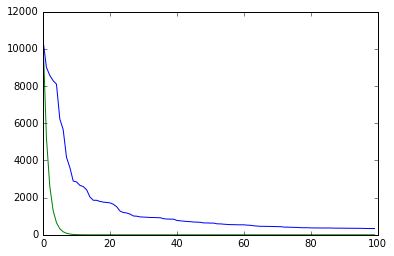

In [15]:
words_lower = []
for word in words:
    words_lower.append(word.lower())
    
word_freq = FreqDist(words_lower)
most_common_words = word_freq.most_common()[:100]

n = most_common_words[0][1]
nums = []
nums.append(n)
while len(nums) < 100:
    nums.append(nums[-1] / 2)


plt.plot([b for (a,b) in most_common_words]) # Blue
plt.plot(nums) # Green

In [16]:
from nltk.corpus import stopwords

# Part B

### One Feature: Length of Description

In [17]:
jobs_b = jobs[['FullDescription', 'SalaryNormalized']]
jobs_b_sample = jobs_b.sample(5000)

In [18]:
descriptions = []
pay = []

for index, value in jobs_b_sample.iterrows():
    descriptions.append(value['FullDescription'])
    pay.append(value['SalaryNormalized'])
    
perc_75 = np.percentile(pay, 75)
    
content = zip(descriptions, pay)

In [19]:
def find_pay_bin(pay):
    return pay >= perc_75

In [30]:
def description_length(desc):
    return {'description_length': len(desc)}

feature_sets = [(description_length(desc), find_pay_bin(pay)) for (desc, pay) in content]

train_set = feature_sets[2500:]
test_set = feature_sets[:2500]

classifier = nltk.NaiveBayesClassifier.train(train_set)

nltk.classify.accuracy(classifier, test_set)

0.69440000000000002

### One Feature: Words in Description

In [31]:
def description_word_length(desc):
    return {'description_word_length': len(desc.split())}

feature_sets = [(description_word_length(desc), find_pay_bin(pay)) for (desc, pay) in content]

train_set = feature_sets[2500:]
test_set = feature_sets[:2500]

classifier = nltk.NaiveBayesClassifier.train(train_set)

nltk.classify.accuracy(classifier, test_set)

0.69240000000000002

In [61]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

job_features = vectorizer.fit_transform(tokens)

job_features = job_features.toarray()

print job_features.shape

(271448L, 5000L)
